In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="",
    config=Config(signature_version='oauth'),
    endpoint_url='')

body = client_.get_object(Bucket='kaggledatasets-donotdelete-pr-bgnjq7gvckdoqm',Key='hotel_bookings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df=df_data_1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [4]:
df.shape

(119390, 32)

In [5]:
df['children'].fillna(0,inplace=True)
df['children']=df['children'].astype('int64',copy=False)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df[['agent','company']].fillna(0,inplace=True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df['stays_nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


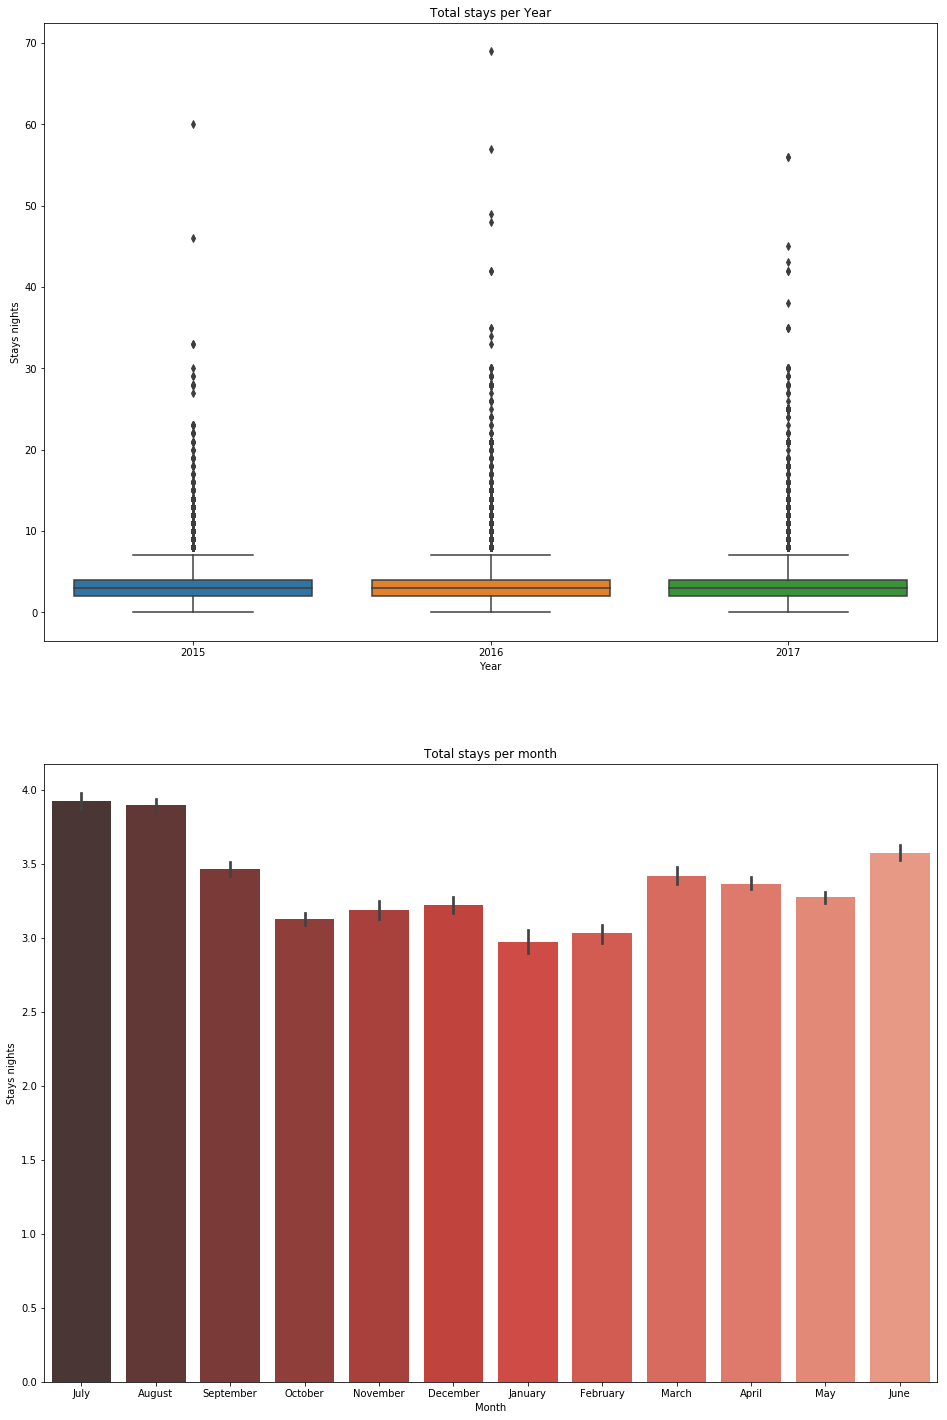

In [9]:
plt.figure(figsize=(16,25))
plt.subplot(2,1,1)
sns.boxplot(x="arrival_date_year", y="stays_nights", data=df)
plt.xlabel('Year')
plt.ylabel('Stays nights')
plt.title('Total stays per Year')

plt.subplot(2,1,2)
sns.barplot(x="arrival_date_month", y="stays_nights", data=df,palette='Reds_d')
plt.xlabel('Month')
plt.ylabel('Stays nights')
plt.title('Total stays per month')

plt.show()

In [10]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays_nights
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,...,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658,0.017779
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,...,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712,0.157167
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,...,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531,0.031438
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,...,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149,0.018719
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,...,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062,-0.027408
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,...,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671,0.762790
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,...,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192,0.941005
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,...,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884,0.105249
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,...,-0.024729,-0.021072,0.048952,0.041070,0.030931,-0.033271,0.324853,0.056255,0.081736,0.050865
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,...,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889,0.022283


In [11]:
category=[]
for a,c,b in zip(df['adults'],df['children'],df['babies']):
    if a!=0 and b!=0 and c!=0:
        category.append('ABC')
    elif a!=0 and b!=0 and c==0 :
        category.append('AB')
    elif a!=0 and b==0 and c!=0 :
        category.append('AC')
    elif a!=0 and b==0 and c==0 :
        category.append('A')
    else :
        category.append('N')
len(category)

119390

In [12]:
df['category']=category
df['category'].value_counts()

A      109878
AC       8195
AB        742
N         403
ABC       172
Name: category, dtype: int64

In [13]:
stayscategory=[]
for e,w in zip(df['stays_in_weekend_nights'],df['stays_in_week_nights']):
    if e!=0 and w!=0:
        stayscategory.append('WE')
    elif e!=0 and w==0 :
        stayscategory.append('E')
    elif e==0 and w!=0 :
        stayscategory.append('W')
    else :
        stayscategory.append('N')
len(stayscategory)

119390

In [14]:
df['stays_category']=stayscategory
df['stays_category'].value_counts()

WE    60462
W     51283
E      6930
N       715
Name: stays_category, dtype: int64

In [22]:
dummies=pd.get_dummies(df['hotel'])
df=pd.concat([df,dummies],axis=1)
df.drop('hotel',axis=1,inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_nights,category,stays_category,City Hotel,Resort Hotel
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0,A,N,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0,A,N,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1,A,W,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1,A,W,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2,A,W,0,1


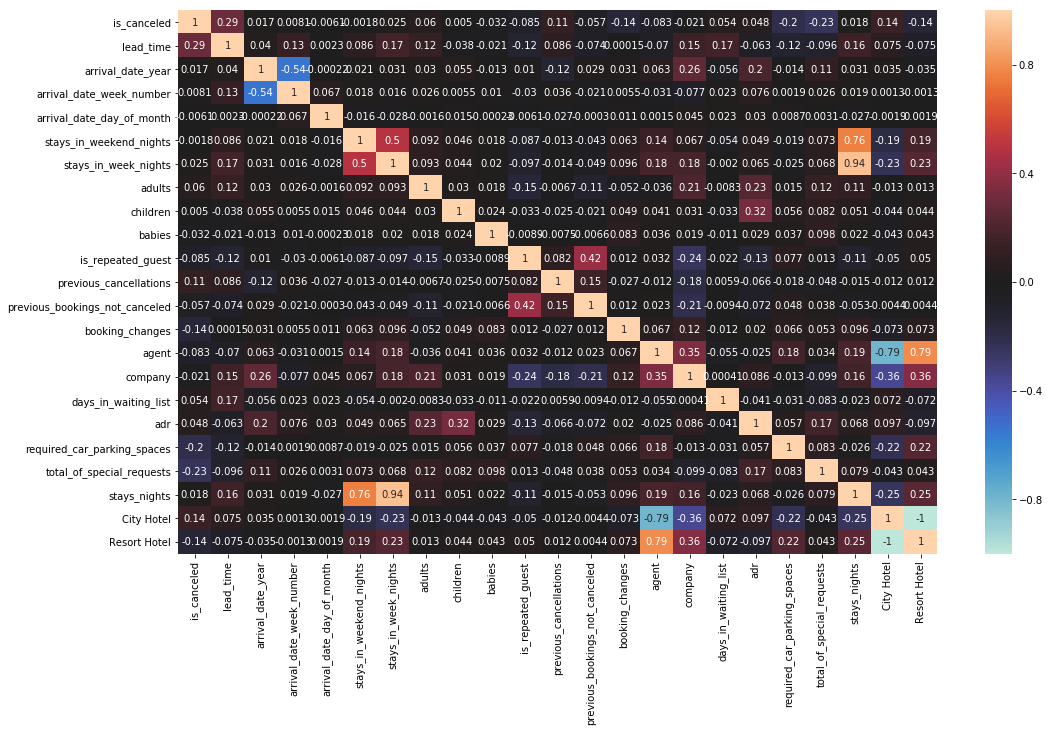

In [24]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,annot=True)

In [25]:
y1=df[df['arrival_date_year']==2015]
y1=y1.sort_values(by='arrival_date_week_number',kind='mergesort')
y1.reset_index(drop=True)

y2=df[df['arrival_date_year']==2016]
y2=y2.sort_values(by='arrival_date_week_number',kind='mergesort')
y2.reset_index(drop=True)

y3=df[df['arrival_date_year']==2017]
y3=y3.sort_values(by='arrival_date_week_number',kind='mergesort')
y3.reset_index(drop=True)
y3.tail()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_nights,category,stays_category,City Hotel,Resort Hotel
119385,0,23,2017,August,35,30,2,5,2,0,...,96.14,0,0,Check-Out,2017-09-06,7,A,WE,1,0
119386,0,102,2017,August,35,31,2,5,3,0,...,225.43,0,2,Check-Out,2017-09-07,7,A,WE,1,0
119387,0,34,2017,August,35,31,2,5,2,0,...,157.71,0,4,Check-Out,2017-09-07,7,A,WE,1,0
119388,0,109,2017,August,35,31,2,5,2,0,...,104.40,0,0,Check-Out,2017-09-07,7,A,WE,1,0
119389,0,205,2017,August,35,29,2,7,2,0,...,151.20,0,2,Check-Out,2017-09-07,9,A,WE,1,0


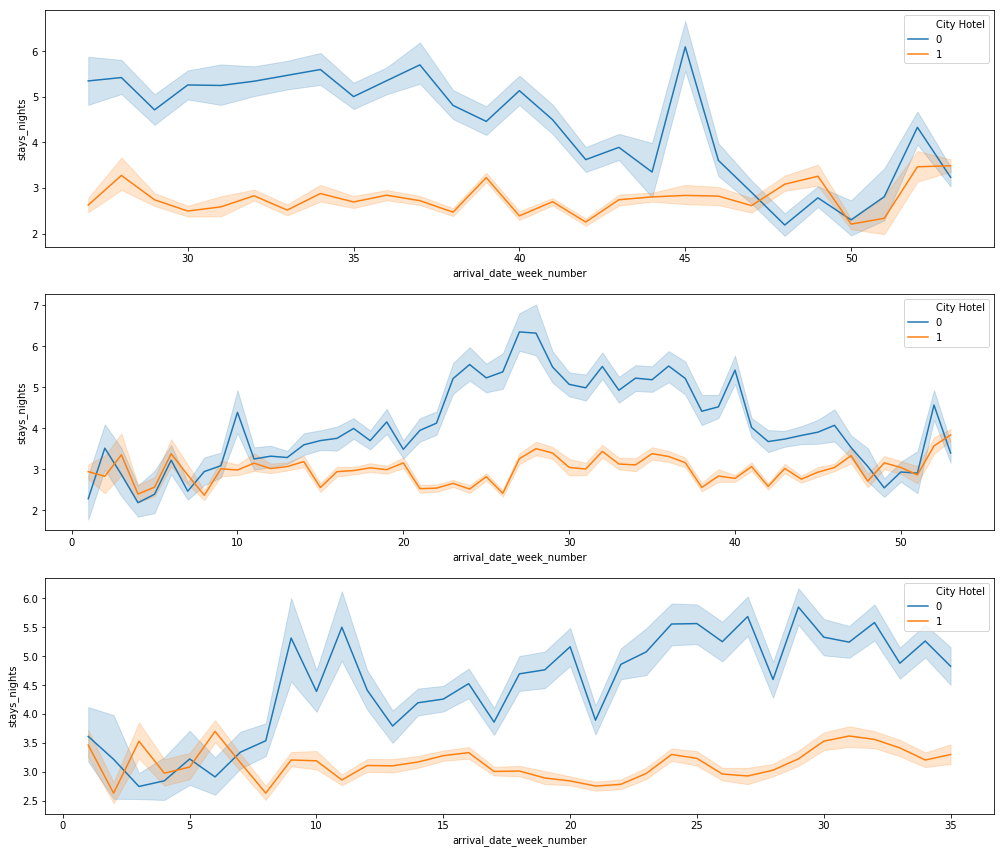

In [27]:
plt.figure(figsize=(17,20))
plt.subplot(4,1,1)
sns.lineplot(x="arrival_date_week_number",y="stays_nights",hue="City Hotel",data=y1)

plt.subplot(4,1,2)
sns.lineplot(x="arrival_date_week_number",y="stays_nights",hue="City Hotel",data=y2)

plt.subplot(4,1,3)
sns.lineplot(x="arrival_date_week_number",y="stays_nights",hue="City Hotel",data=y3)

plt.show()

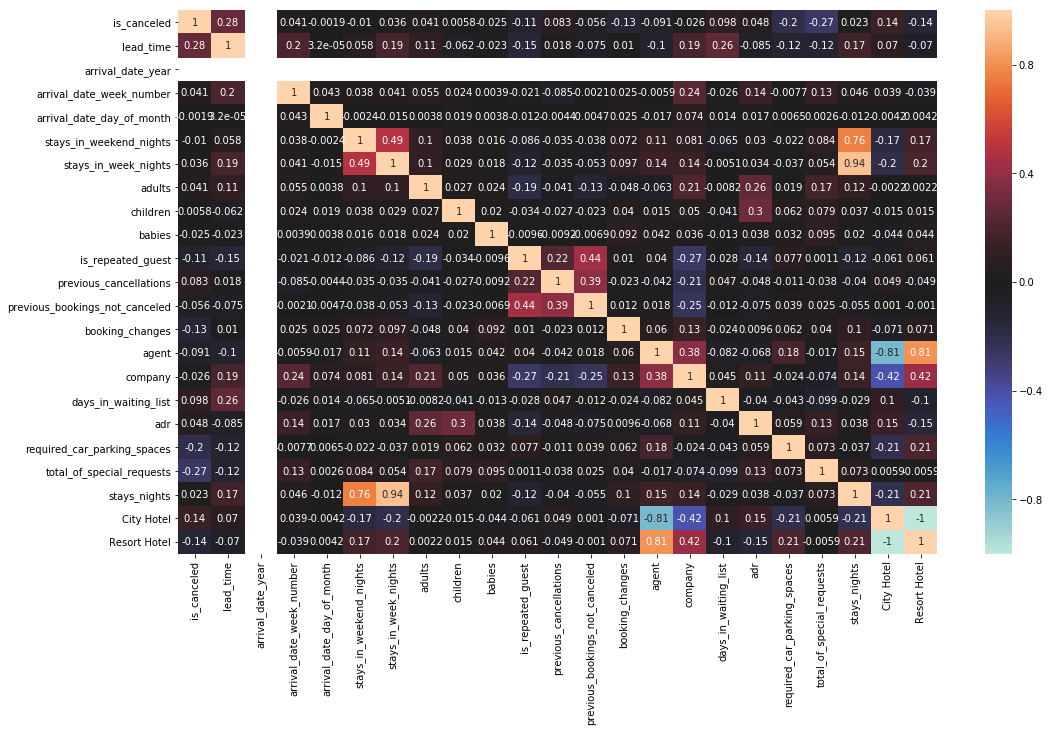

In [28]:
plt.figure(figsize=(17,10))
sns.heatmap(y2.corr(),vmin=-1,vmax=1,center=0,annot=True)

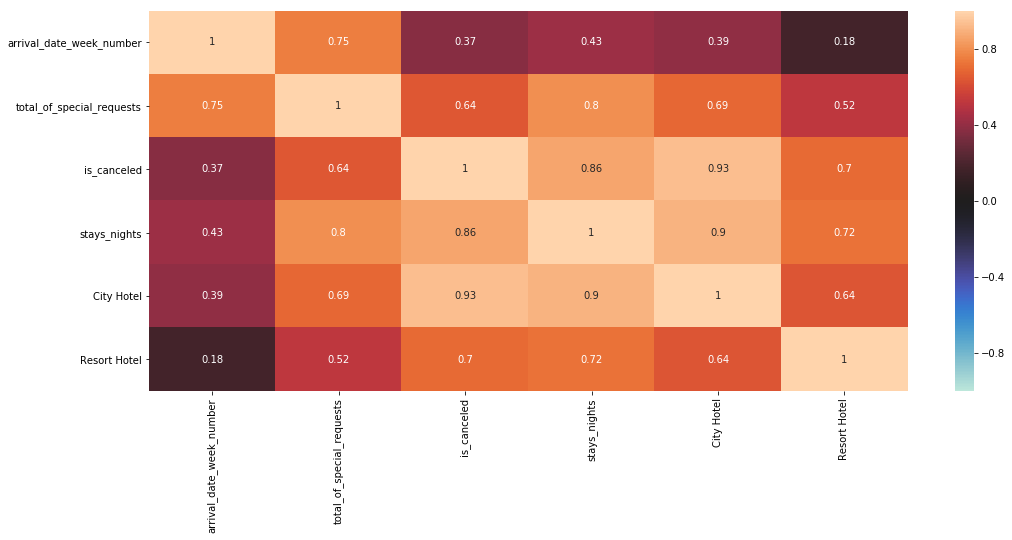

In [30]:
# We will use 2016 since we got the data for every week of the year
df2=y2.groupby('arrival_date_week_number',as_index=False).agg({'total_of_special_requests':'sum','is_canceled':'sum','stays_nights':'sum','City Hotel':'sum','Resort Hotel':'sum'})
df1=y1.groupby('arrival_date_week_number',as_index=False).agg({'total_of_special_requests':'sum','is_canceled':'sum','stays_nights':'sum','City Hotel':'sum','Resort Hotel':'sum'})
df3=y3.groupby('arrival_date_week_number',as_index=False).agg({'total_of_special_requests':'sum','is_canceled':'sum','stays_nights':'sum','City Hotel':'sum','Resort Hotel':'sum'})
plt.figure(figsize=(17,7))
sns.heatmap(df2.corr(),vmin=-1,vmax=1,center=0,annot=True)

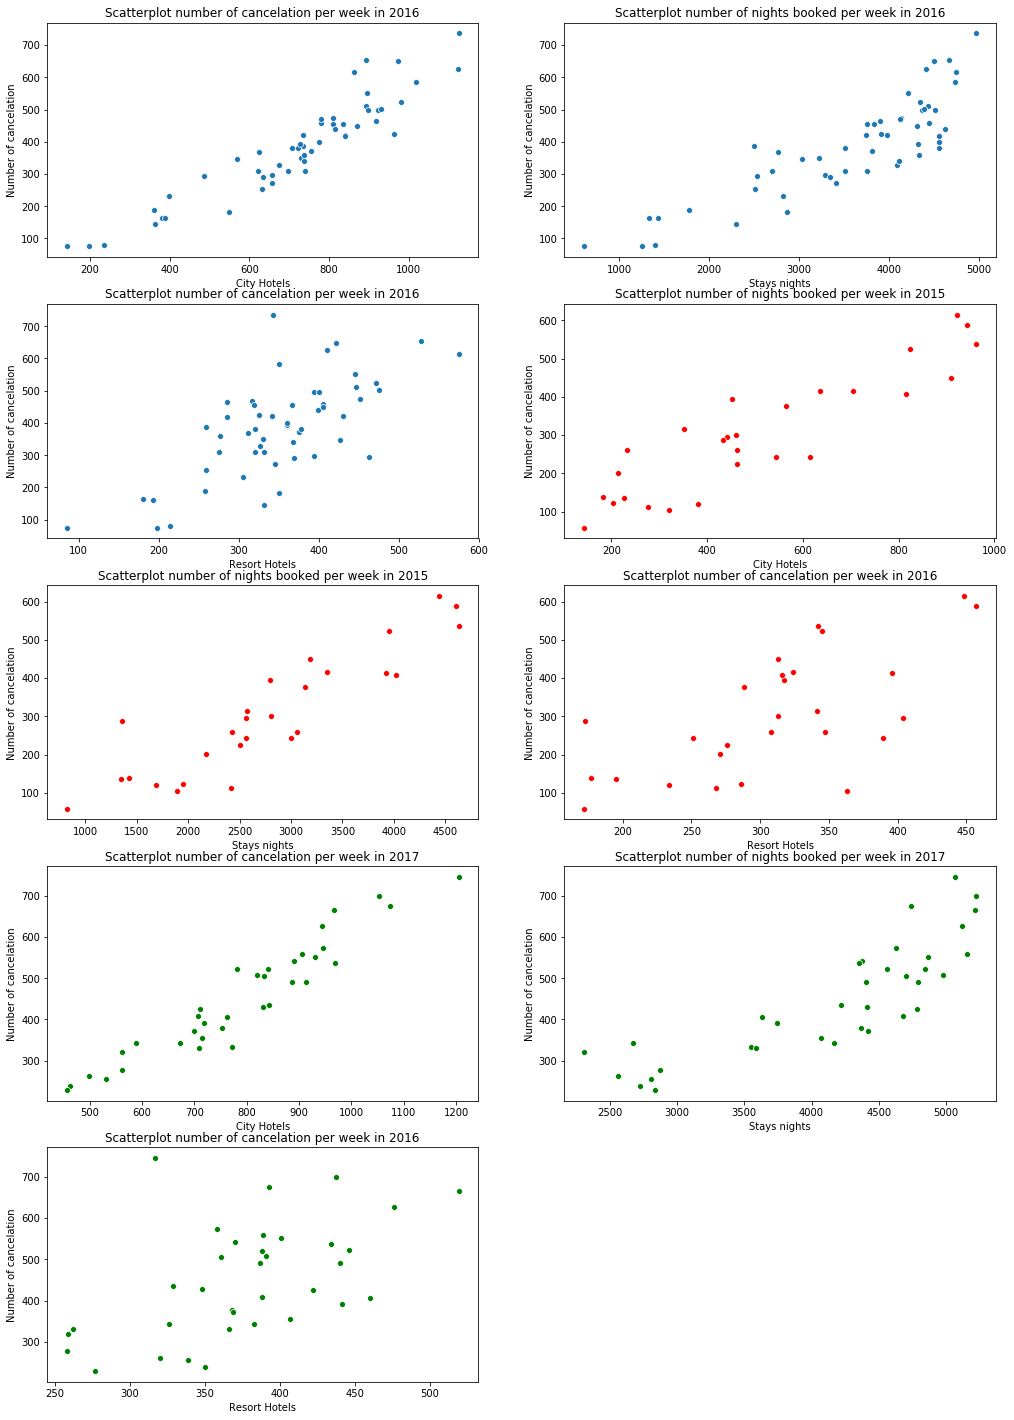

In [33]:
# Add the year to the week number
plt.figure(figsize=(17,25))
plt.subplot(5,2,1)
sns.scatterplot(x="City Hotel",y="is_canceled",data=df2)
plt.title("Scatterplot number of cancelation per week in 2016")
plt.xlabel("City Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,2)
sns.scatterplot(x="stays_nights",y="is_canceled",data=df2)
plt.title("Scatterplot number of nights booked per week in 2016")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,3)
sns.scatterplot(x="Resort Hotel",y="is_canceled",data=df2)
plt.title("Scatterplot number of cancelation per week in 2016")
plt.xlabel("Resort Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,4)
sns.scatterplot(x="City Hotel",y="is_canceled",data=df1,color="r")
plt.title("Scatterplot number of nights booked per week in 2015")
plt.xlabel("City Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,5)
sns.scatterplot(x="stays_nights",y="is_canceled",data=df1,color="r")
plt.title("Scatterplot number of nights booked per week in 2015")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,6)
sns.scatterplot(x="Resort Hotel",y="is_canceled",data=df1,color="r")
plt.title("Scatterplot number of cancelation per week in 2016")
plt.xlabel("Resort Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,7)
sns.scatterplot(x="City Hotel",y="is_canceled",data=df3,color="g")
plt.title("Scatterplot number of cancelation per week in 2017")
plt.xlabel("City Hotels")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,8)
sns.scatterplot(x="stays_nights",y="is_canceled",data=df3,color="g")
plt.title("Scatterplot number of nights booked per week in 2017")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(5,2,9)
sns.scatterplot(x="Resort Hotel",y="is_canceled",data=df3,color="g")
plt.title("Scatterplot number of cancelation per week in 2016")
plt.xlabel("Resort Hotels")
plt.ylabel("Number of cancelation")

plt.show()

First we're gonna predict the best time to book a hotel room

The first model

target : is_canceld

features : stays_nights

In [34]:
df1x=df1[['stays_nights','City Hotel','Resort Hotel']]
df2x=df2[['stays_nights','City Hotel','Resort Hotel']]
df3x=df3[['stays_nights','City Hotel','Resort Hotel']]
df1y=df1[['is_canceled']]
df2y=df2[['is_canceled']]
df3y=df3[['is_canceled']]
df1x.head()

,stays_nights,City Hotel,Resort Hotel
0,1425,182.0,177.0
1,2171,214.0,271.0
2,2573,352.0,341.0
3,2798,453.0,317.0
4,2422,232.0,347.0


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg=LinearRegression()
reg.fit(df1x,df1y)
reg.fit(df2x,df2y)
yhat=reg.predict(df3x)

print('The R^2 score is : ',r2_score(df3y,yhat))


The R^2 score is :  0.8647177505413344


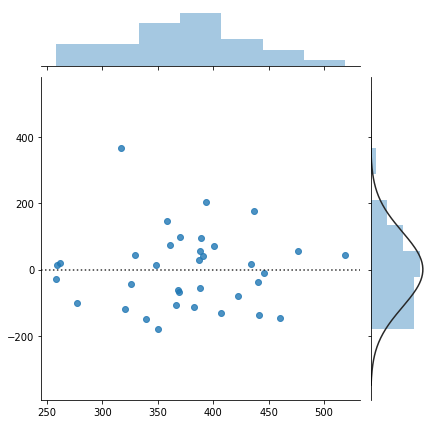

In [45]:
sns.jointplot(df3x[['Resort Hotel']],df3y,kind="resid")

plt.show()

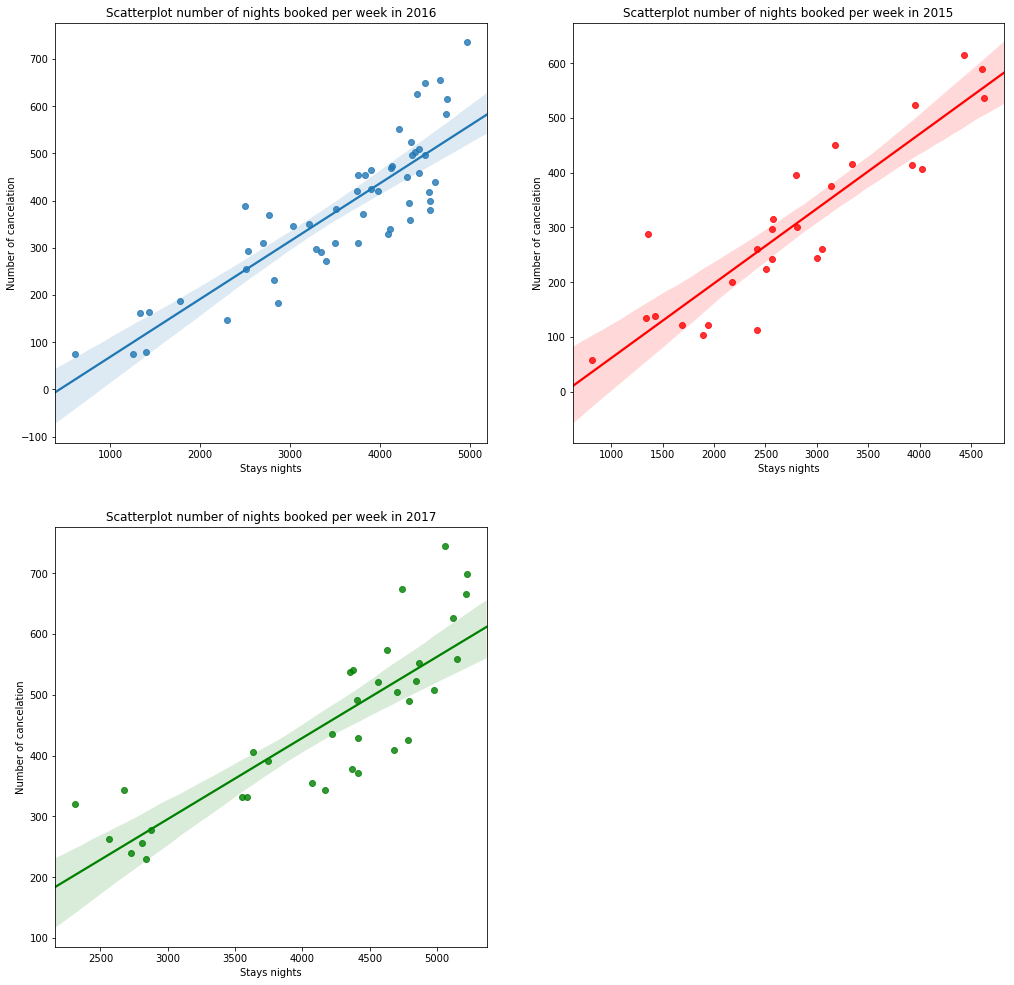

In [36]:
# Add the year to the week number
plt.figure(figsize=(17,17))
plt.subplot(2,2,1)
sns.regplot(x="stays_nights",y="is_canceled",data=df2)
plt.title("Scatterplot number of nights booked per week in 2016")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(2,2,2)
sns.regplot(x="stays_nights",y="is_canceled",data=df1,color="r")
plt.title("Scatterplot number of nights booked per week in 2015")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.subplot(2,2,3)
sns.regplot(x="stays_nights",y="is_canceled",data=df3,color="g")
plt.title("Scatterplot number of nights booked per week in 2017")
plt.xlabel("Stays nights")
plt.ylabel("Number of cancelation")

plt.show()

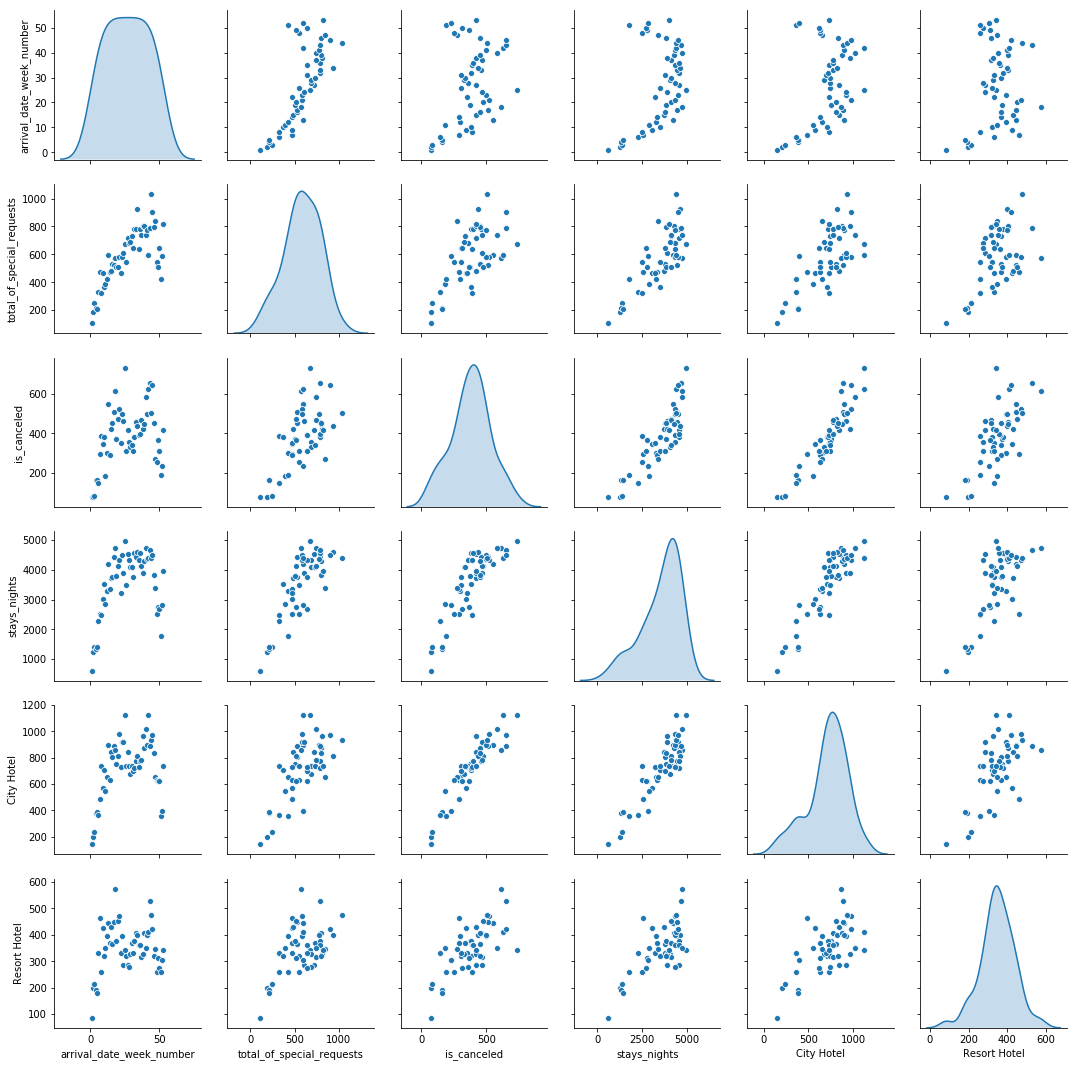

In [48]:
g = sns.pairplot(df2,diag_kind="kde")

Since we got the data for the year of 2016. Let's select the weeks with lowest number of cancelation or the lowest night stays